In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
data=pd.read_csv(r'CarPrice.csv')

In [3]:
data.shape

(205, 26)

In [4]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
data.drop('car_ID',axis=1, inplace=True)
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
data_count=data.CarName.value_counts()

In [8]:
data_count

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [9]:
data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

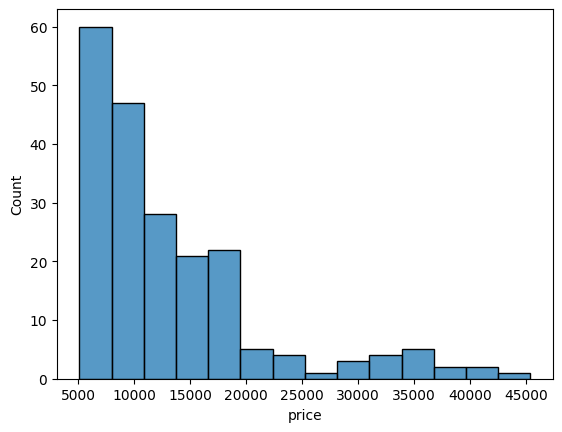

In [10]:
sns.histplot(data.price)

In [11]:
import plotly.express as px
figure = px.sunburst(data, path=["CarName","fueltype","horsepower"], 
                     values="price", 
                     width=700, height=700, color_continuous_scale="Cividis", 
                     title="Summarized representation of Unemployment Rate in India")
figure.show()

In [12]:
column_of_interest=['symboling','wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight',
        'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']

corr=data[column_of_interest].corr()
corr

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


<Axes: >

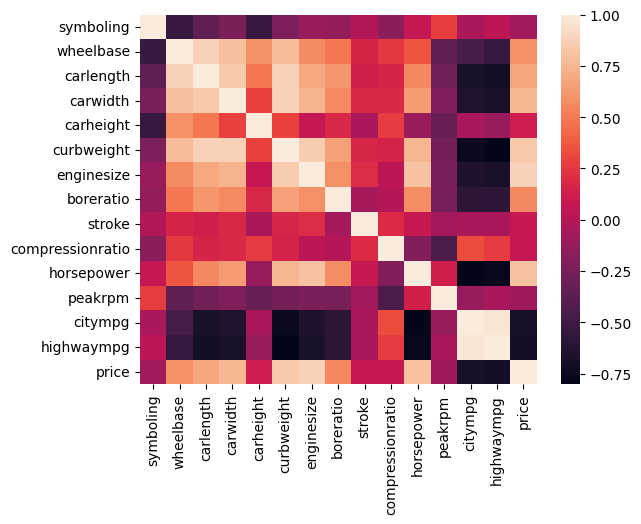

In [13]:
sns.heatmap(corr)

In [14]:
final_data=data[column_of_interest]
final_data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
final_data.shape

(205, 15)

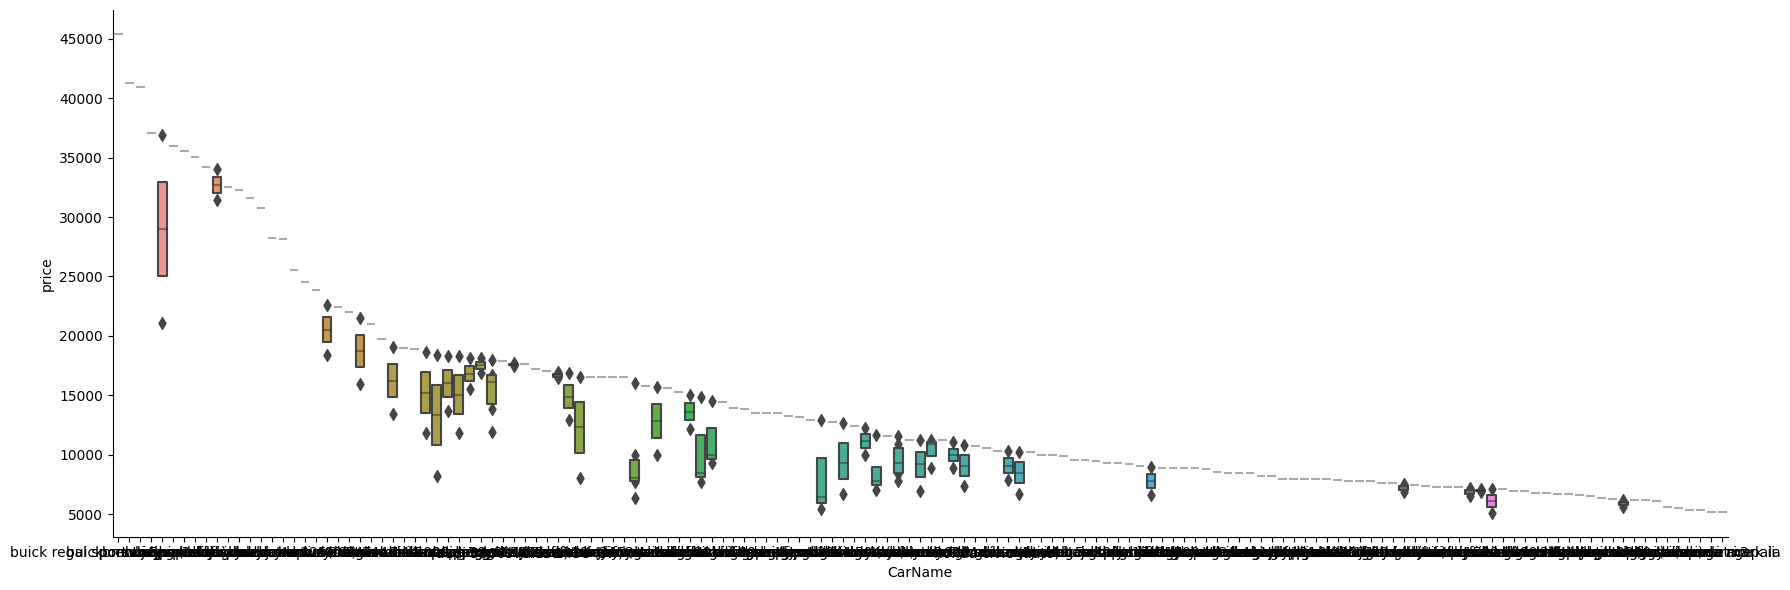

In [17]:
sns.catplot(y="price", x="CarName", data=data.sort_values("price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [18]:
#data.head()
x=final_data.iloc[:,0:14]
x.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [19]:
y=final_data.iloc[:,14:]
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [20]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [21]:
print(model.feature_importances_)

[0.00366726 0.02774355 0.02813028 0.08827698 0.00788883 0.18453666
 0.27602236 0.03109112 0.00921534 0.01088807 0.15932437 0.02197735
 0.07486692 0.07637091]


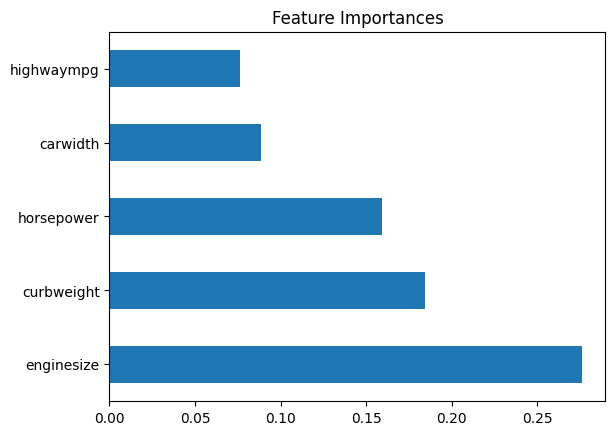

In [22]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [24]:
X_train.shape

(153, 14)

In [25]:
X_test.shape

(52, 14)

In [26]:
X_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
163,1,94.5,168.7,64.0,52.6,2169,98,3.19,3.03,9.0,70,4800,29,34
61,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84,4800,26,32
75,1,102.7,178.4,68.0,54.8,2910,140,3.78,3.12,8.0,175,5000,19,24
106,1,99.2,178.5,67.9,49.7,3139,181,3.43,3.27,9.0,160,5200,19,25
63,0,98.8,177.8,66.5,55.5,2443,122,3.39,3.39,22.7,64,4650,36,42


In [27]:
X_test.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
52,1,93.1,159.1,64.2,54.1,1905,91,3.03,3.15,9.0,68,5000,31,38
181,-1,104.5,187.8,66.5,54.1,3151,161,3.27,3.35,9.2,156,5200,19,24
5,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25
18,2,88.4,141.1,60.3,53.2,1488,61,2.91,3.03,9.5,48,5100,47,53
188,2,97.3,171.7,65.5,55.7,2300,109,3.19,3.40,10.0,100,5500,26,32


In [28]:
y_train.shape

(153, 1)

In [29]:
y_train.head()

,price
163,8058.0
61,10595.0
75,16503.0
106,18399.0
63,10795.0


In [30]:
y_test.shape

(52, 1)

In [31]:
y_test.head()

,price
52,6795.0
181,15750.0
5,15250.0
18,5151.0
188,9995.0


Decision Tree Regressor

In [32]:
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error
model.score(X_test, predictions)

1.0

Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [35]:
y_pred = reg_rf.predict(X_test)

In [36]:
reg_rf.score(X_train, y_train)

0.9877913827502645

In [37]:
reg_rf.score(X_test, y_test)

0.9059007393390096

In [38]:
reg_rf.score(X_test, y_pred)

1.0

Hyper Parameter Tuning

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [41]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [42]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [43]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [44]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [45]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1778.7263778205129
MSE: 7016796.152394036
RMSE: 2648.9235837211377
